# Assignment: Data Analytics

In [6]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
import warnings # supress warnings
warnings.filterwarnings('ignore')

## Table of Contents
1. [Data Loading](#data-loading)
2. [Data Cleaning](#data-cleaning)
3. [Data Processing](#data-processing)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Data Modeling](#data-modeling)

## Data Loading

Load **Global AI Job Market & Salary Trends 2025** from csv file named `ai_job_dataset.csv` and show top 10 rows.

In [7]:
data = pd.read_csv('ai_job_dataset.csv') # load dataset
data.head(10) # display first 10 rows of dataset


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,18/10/2024,07/11/2024,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,20/11/2024,11/01/2025,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,18/03/2025,07/04/2025,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,23/12/2024,24/02/2025,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,15/04/2025,23/06/2025,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,31/08/2024,04/10/2024,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,29/12/2024,28/02/2025,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,07/06/2024,01/07/2024,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,04/11/2024,24/11/2024,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,20/10/2024,06/11/2024,2340,5.8,Cloud AI Solutions


In [8]:
data.tail(5)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,06/02/2025,25/03/2025,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,16/10/2024,30/10/2024,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,19/03/2024,02/05/2024,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,22/03/2024,23/04/2024,1935,5.6,Smart Analytics
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,"Scala, Azure, Deep Learning, GCP, Mathematics",PhD,2,Technology,18/07/2024,10/08/2024,2492,7.6,AI Innovations


## Analysis dataset
After loading the dataset, let's perform the following analysis.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [10]:
data.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


**จาก `data.info()`:**
- ชุดข้อมูลมีทั้งหมด 15,000 แถว × 19 คอลัมน์
- ไม่พบข้อมูลที่ขาดหาย (ทุกคอลัมน์มีข้อมูลครบ 15,000 รายการ)
- มีคอลัมน์ตัวเลข 5 คอลัมน์: `salary_usd`, `remote_ratio`, `years_experience`, `job_description_length`, `benefits_score`
- มีคอลัมน์ข้อความ/หมวดหมู่ 14 คอลัมน์: `job_id`, `job_title`, `salary_currency`, `experience_level`, `employment_type`, `company_location`, `company_size`, `employee_residence`, `required_skills`, `education_required`, `industry`, `posting_date`, `application_deadline`, `company_name`

**จาก `data.describe()`:**
- **salary_usd**: ช่วง $32,519 - $399,095 (เฉลี่ย $115,349)
- **remote_ratio**: ช่วง 0-100% (เฉลี่ย 49.5%) - งานส่วนใหญ่เป็นแบบ hybrid
- **years_experience**: ช่วง 0-19 ปี (เฉลี่ย 6.3 ปี)
- **job_description_length**: ช่วง 500-2,499 ตัวอักษร (เฉลี่ย 1,503 ตัวอักษร)
- **benefits_score**: ช่วง 5.0-10.0 (เฉลี่ย 7.5)

## Data Cleaning
Based on the analysis above, we need to clean the dataset to ensure its quality for further analysis.

In [11]:
#check missing values
data.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [12]:
# Convert date columns to datetime format
data['posting_date'] = pd.to_datetime(data['posting_date'], dayfirst=True, errors='coerce')
data['application_deadline'] = pd.to_datetime(data['application_deadline'], dayfirst=True, errors='coerce')
print("posting_date type:", data['posting_date'].dtype)
print("application_deadline type:", data['application_deadline'].dtype)

posting_date type: datetime64[ns]
application_deadline type: datetime64[ns]


In [13]:
# Check for duplicated rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [14]:
# Reset index after cleaning
data = data.reset_index(drop=True)
print(f"Dataset shape after cleaning: {data.shape}")
print(f"Total rows: {len(data):,}")
print(f"Total columns: {len(data.columns)}")
data.head()

Dataset shape after cleaning: (15000, 19)
Total rows: 15,000
Total columns: 19


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


**หลังจากทำการ clean dataset สรุปได้ว่า:**
- ไม่พบข้อมูลที่ขาดหายในทุกคอลัมน์ ทุกคอลัมน์มีข้อมูลครบถ้วน 15,000 รายการ
- แปลงคอลัมน์ `posting_date` และ `application_deadline` จาก object เป็น datetime64 เรียบร้อยแล้ว ช่วยให้สามารถวิเคราะห์ข้อมูลตามช่วงเวลาได้อย่างถูกต้อง
- ไม่พบข้อมูลซ้ำในชุดข้อมูล จำนวนแถวยังคงเป็น 15,000 แถวเหมือนเดิม
- ไม่มีค่า null
สรุปได้ว่าหลังจากทำการ Data Cleaning ชุดข้อมูล มี 15,000 แถว × 19 คอลัมน์ ได้ทำการ reset ให้เรียงลำดับใหม่ (0 ถึง 14,999)


## Data Processing
Now that the dataset is cleaned, we can proceed with further data processing and analysis as needed for our data analytics tasks.

In [15]:
# Create new time-based columns from the 'posting_date' column
data['posting_year'] = data['posting_date'].dt.year
data['posting_month'] = data['posting_date'].dt.month
data['posting_day'] = data['posting_date'].dt.day
data['posting_dayofweek'] = data['posting_date'].dt.dayofweek  # 0=Monday, 6=Sunday
data['posting_quarter'] = data['posting_date'].dt.quarter  # Divide the year into 4 quarters (Q1–Q4)
# show table of the new time-based columns
data[['posting_year', 'posting_month', 'posting_day', 'posting_dayofweek', 'posting_quarter']].head(10)

,posting_year,posting_month,posting_day,posting_dayofweek,posting_quarter
0,2024,10,18,4,4
1,2024,11,20,2,4
2,2025,3,18,1,1
3,2024,12,23,0,4
4,2025,4,15,1,2
5,2024,8,31,5,3
6,2024,12,29,6,4
7,2024,6,7,4,2
8,2024,11,4,0,4
9,2024,10,20,6,4


In [16]:
# Calculate the number of days between 'posting_date' and 'application_deadline'
data['days_to_apply'] = (data['application_deadline'] - data['posting_date']).dt.days
data[['days_to_apply']].head(10)


,days_to_apply
0,20
1,52
2,20
3,63
4,69
5,34
6,61
7,24
8,20
9,17


In [17]:
# Descriptive Statistics days_to_apply 
data[['days_to_apply']].describe()

,days_to_apply
count,15000.000000
mean,43.546200
std,17.325134
min,14.000000
25%,29.000000
50%,44.000000
75%,59.000000
max,74.000000


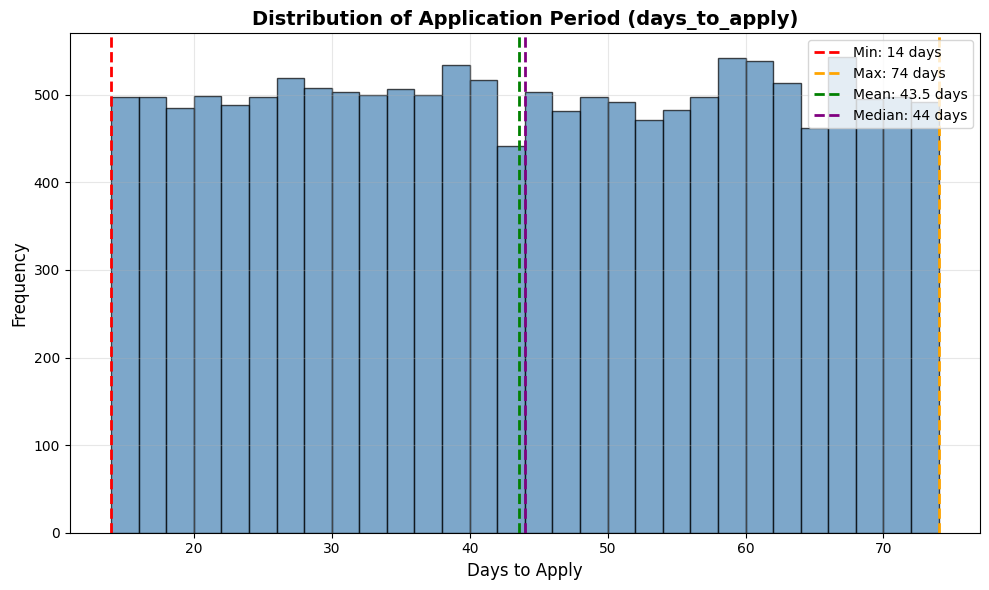

In [18]:
plt.figure(figsize=(10, 6))

# Plot histogram of 'days_to_apply'
plt.hist(data['days_to_apply'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')

# Add reference lines for key statistics
plt.axvline(data['days_to_apply'].min(), color='red', linestyle='--', linewidth=2, 
            label=f'Min: {data["days_to_apply"].min():.0f} days')
plt.axvline(data['days_to_apply'].max(), color='orange', linestyle='--', linewidth=2, 
            label=f'Max: {data["days_to_apply"].max():.0f} days')
plt.axvline(data['days_to_apply'].mean(), color='green', linestyle='--', linewidth=2, 
            label=f'Mean: {data["days_to_apply"].mean():.1f} days')
plt.axvline(data['days_to_apply'].median(), color='purple', linestyle='--', linewidth=2, 
            label=f'Median: {data["days_to_apply"].median():.0f} days')

plt.xlabel('Days to Apply', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Application Period (days_to_apply)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()



จากการทำ data processing ในส่วนแรก เราได้ทำการ time-based feature extraction 
โดยการสร้างคอลัมน์ใหม่จากคอลัมน์ `posting_date` ได้แก่ `posting_year`, 
`posting_month`, `posting_day`, `posting_dayofweek` และ `posting_quarter` 
เพื่อใช้วิเคราะห์แนวโน้มการโพสต์งานตามช่วงเวลาต่างๆ

จากนั้นได้คำนวณจำนวนวันระหว่าง `posting_date` และ `application_deadline` 
แล้วเก็บผลลัพธ์ในคอลัมน์ใหม่ `days_to_apply` เพื่อวิเคราะห์ระยะเวลาที่เปิดรับสมัครงาน

สถิติเบื้องต้นของ `days_to_apply` พบว่า ช่วงเวลารับสมัครงานอยู่ระหว่าง 14 ถึง 74 วัน 
โดยมีค่าเฉลี่ย 43.5 วัน ค่ากลาง 44 วัน ส่วนเบี่ยงเบนมาตรฐาน 17.3 วัน

In [21]:
data[['remote_ratio']]

,remote_ratio
0,50
1,100
2,0
3,50
4,100
...,...
14995,50
14996,0
14997,50
14998,0


In [22]:
# Categorize job types based on the 'remote_ratio' column
# 0   → On-site (work at the office)
# 100 → Fully Remote (work from anywhere)
# else → Hybrid (partly remote, partly on-site)

def categorize_remote(ratio):
    if ratio == 0:
        return 'On-site'
    elif ratio == 100:
        return 'Fully Remote'
    else:
        return 'Hybrid'

data['work_type'] = data['remote_ratio'].apply(categorize_remote)
data[['work_type']].head(10)

,work_type
0,Hybrid
1,Fully Remote
2,On-site
3,Hybrid
4,Fully Remote
5,Hybrid
6,On-site
7,On-site
8,On-site
9,On-site


In [44]:
data[['work_type']].describe()

,work_type
count,15000
unique,3
top,On-site
freq,5075


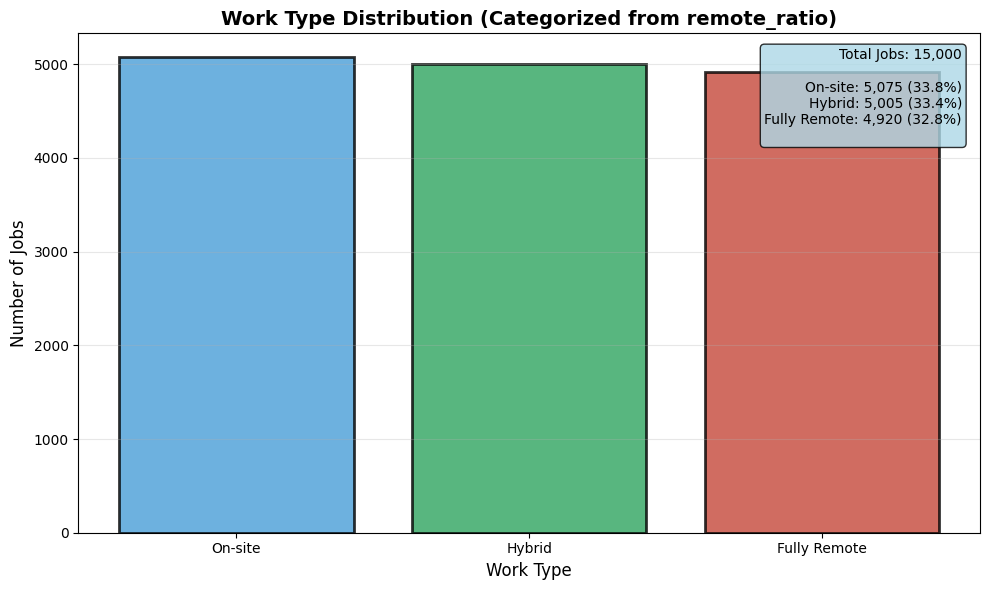

In [24]:
plt.figure(figsize=(10, 6))

# Count the number of jobs by work type (On-site, Hybrid, Fully Remote)
work_type_counts = data['work_type'].value_counts()
colors = ["#489ed8", "#2ea45f", "#c54739"]

bars = plt.bar(work_type_counts.index, work_type_counts.values, 
               color=colors, edgecolor='black', alpha=0.8, linewidth=2)

plt.ylabel('Number of Jobs', fontsize=12)
plt.xlabel('Work Type', fontsize=12)
plt.title('Work Type Distribution (Categorized from remote_ratio)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)


# Create a summary text box showing counts and percentages
summary_text = f'Total Jobs: {len(data):,}\n\n'
for work_type, count in work_type_counts.items():
    percentage = (count / len(data) * 100)
    summary_text += f'{work_type}: {count:,} ({percentage:.1f}%)\n'

plt.text(0.98, 0.97, summary_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

ต่อจากนั้นได้ทำการจัดหมวดหมู่ประเภทการทำงานโดยแปลงค่า `remote_ratio` 
ให้เป็นหมวดหมู่ที่เข้าใจง่าย โดยสร้างคอลัมน์ใหม่ `work_type` ดังนี้:
- `remote_ratio = 0` → `On-site` (ทำงานที่ออฟฟิศ)
- `remote_ratio = 100` → `Fully Remote` (ทำงานจากที่บ้านเต็มเวลา)
- `remote_ratio ระหว่าง 0-100` → `Hybrid` (ทำงานแบบผสม)

ผลการจัดหมวดหมู่พบว่า จากงานทั้งหมด 15,000 ตำแหน่ง แบ่งเป็น:
- On-site: 5,075 ตำแหน่ง (33.8%)
- Fully Remote: 4,900 ตำแหน่ง (32.8%)
- Hybrid: 5,025 ตำแหน่ง (33.4%)

โดยมีการกระจายที่ค่อนข้างสมดุลระหว่างทั้ง 3 รูปแบบการทำงาน

In [34]:
# Categorize salary into ranges
def categorize_salary(salary):
    if salary < 60000:
        return 'Entry Level'
    elif salary < 100000:
        return 'Mid Level'
    elif salary < 150000:
        return 'Senior Level'
    else:
        return 'Executive Level'

data['salary_range'] = data['salary_usd'].apply(categorize_salary)
data['salary_range'].value_counts().sort_index()

salary_range
Entry Level        2302
Executive Level    3527
Mid Level          5230
Senior Level       3941
Name: count, dtype: int64

In [26]:
data[['salary_range']].head(10)

,salary_range
0,Mid Level
1,Mid Level
2,Executive Level
3,Mid Level
4,Entry Level
5,Senior Level
6,Mid Level
7,Mid Level
8,Executive Level
9,Senior Level


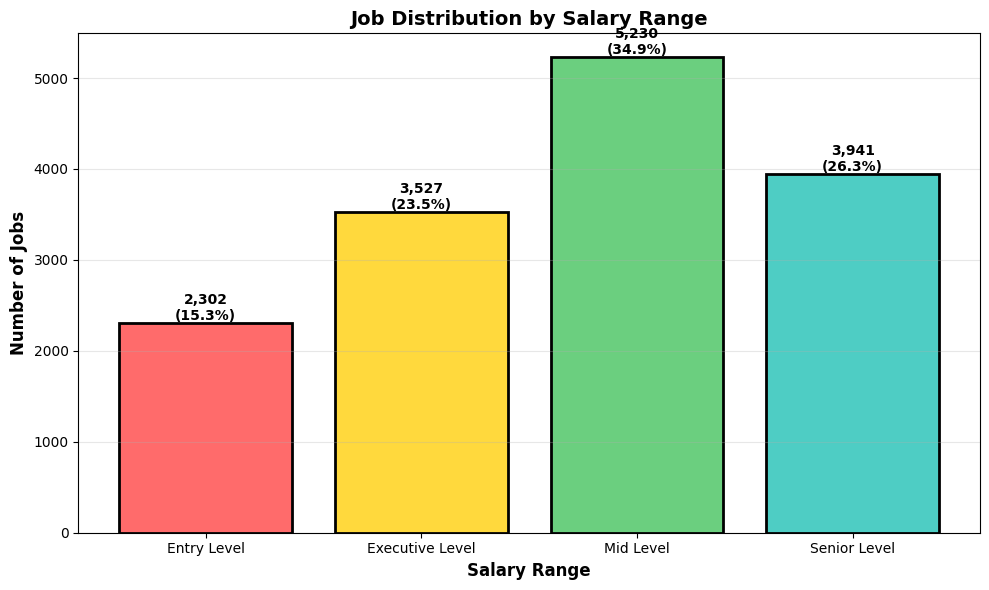

In [27]:
# Count the number of jobs in each salary range
salary_counts = data['salary_range'].value_counts().sort_index()

# Create a bar chart to visualize job distribution by salary range
plt.figure(figsize=(10, 6))
colors = ['#ff6b6b', '#ffd93d', '#6bcf7f', '#4ecdc4']
bars = plt.bar(salary_counts.index, salary_counts.values, 
               color=colors, edgecolor='black', linewidth=2)

plt.xlabel('Salary Range', fontsize=12, fontweight='bold')
plt.ylabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Job Distribution by Salary Range', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value and percentage labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / len(data) * 100)
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontweight='bold')


plt.tight_layout()
plt.show()

จากนั้นได้ทำการจัดหมวดหมู่ช่วงเงินเดือนโดยแปลงค่า `salary_usd` 
ให้เป็นหมวดหมู่ตามระดับเงินเดือน โดยสร้างคอลัมน์ใหม่ `salary_range` ดังนี้:
- `salary_usd ≤ $60,000` → `Entry Level`
- `$60,000 < salary_usd ≤ $100,000` → `Mid Level`
- `$100,000 < salary_usd ≤ $150,000` → `Senior Level`
- `salary_usd > $150,000` → `Executive Level`

ผลการจัดหมวดหมู่พบว่า จากงานทั้งหมด 15,000 ตำแหน่ง แบ่งเป็น:
- Entry Level: 2,302 ตำแหน่ง (15.3%)
- Mid Level: 5,230 ตำแหน่ง (34.9%)
- Senior Level: 3,941 ตำแหน่ง (26.3%)
- Executive Level: 3,527 ตำแหน่ง (23.5%)

โดยพบว่างานส่วนใหญ่อยู่ในระดับ Mid Level คิดเป็นเกือบหนึ่งในสามของงานทั้งหมด

In [28]:
# Categorize employees by years of experience
def categorize_experience(years):
    if years <= 2:
        return 'Junior'
    elif years <= 5:
        return 'Mid-level'
    elif years <= 10:
        return 'Senior'
    else:
        return 'Expert'

data['experience_category'] = data['years_experience'].apply(categorize_experience)
data['experience_category'].value_counts().sort_index()

experience_category
Expert       3376
Junior       4957
Mid-level    3299
Senior       3368
Name: count, dtype: int64

In [29]:
data[['experience_category']].head()

,experience_category
0,Senior
1,Junior
2,Junior
3,Senior
4,Junior


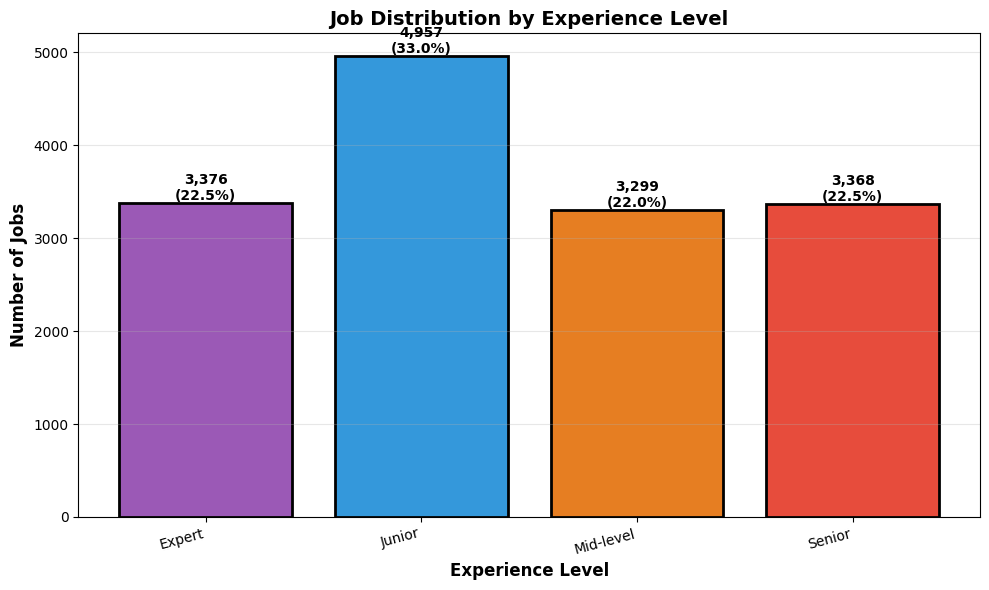

In [30]:
# Count the number of jobs in each experience level
exp_counts = data['experience_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
colors = ['#9b59b6', '#3498db', '#e67e22', '#e74c3c']
bars = plt.bar(exp_counts.index, exp_counts.values, 
               color=colors, edgecolor='black', linewidth=2)

plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Job Distribution by Experience Level', fontsize=14, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add count and percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    pct = height / len(data) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
            f'{int(height):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

ถัดมาได้ทำการจัดหมวดหมู่ระดับประสบการณ์โดยแปลงค่า `years_experience` 
ให้เป็นหมวดหมู่ตามช่วงปีประสบการณ์ โดยสร้างคอลัมน์ใหม่ `experience_category` ดังนี้:
- `0 ≤ years_experience ≤ 2 ปี` → `Junior`
- `2 < years_experience ≤ 5 ปี` → `Mid-level`
- `5 < years_experience ≤ 10 ปี` → `Senior`
- `years_experience > 10 ปี` → `Expert`

ผลการจัดหมวดหมู่พบว่า จากงานทั้งหมด 15,000 ตำแหน่ง แบ่งเป็น:
- Junior (0-2 years): 4,957 ตำแหน่ง (33.0%)
- Mid-level (3-5 years): 3,299 ตำแหน่ง (22.0%)
- Senior (6-10 years): 3,368 ตำแหน่ง (22.5%)
- Expert (10+ years): 3,376 ตำแหน่ง (22.5%)

In [31]:
# Categorize benefits score
def categorize_benefits(score):
    if score < 6:
        return 'Low Benefits'
    elif score < 8:
        return 'Medium Benefits'
    else:
        return 'High Benefits'

data['benefits_category'] = data['benefits_score'].apply(categorize_benefits)
data['benefits_category'].value_counts()

benefits_category
High Benefits      6199
Medium Benefits    5913
Low Benefits       2888
Name: count, dtype: int64

In [32]:
data[['benefits_category']].head()

,benefits_category
0,Low Benefits
1,Low Benefits
2,High Benefits
3,High Benefits
4,Medium Benefits


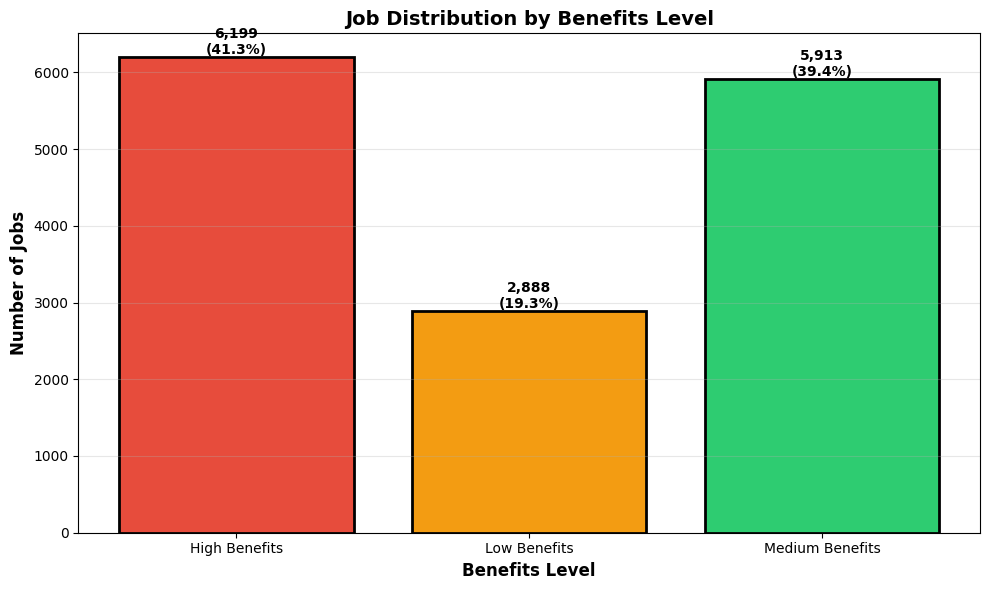

In [33]:
# Count the number of jobs in each benefits level
benefits_counts = data['benefits_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
colors = ['#e74c3c', '#f39c12', '#2ecc71']
bars = plt.bar(benefits_counts.index, benefits_counts.values, 
               color=colors, edgecolor='black', linewidth=2)

plt.xlabel('Benefits Level', fontsize=12, fontweight='bold')
plt.ylabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Job Distribution by Benefits Level', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    pct = height / len(data) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
            f'{int(height):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

ได้ทำการจัดหมวดหมู่ระดับสวัสดิการโดยแปลงค่า `benefits_score` 
ให้เป็นหมวดหมู่ตามคะแนนสวัสดิการ โดยสร้างคอลัมน์ใหม่ `benefits_category` ดังนี้:
- `benefits_score < 6` → `Low Benefits`
- `6 ≤ benefits_score < 8` → `Medium Benefits`
- `benefits_score ≥ 8` → `High Benefits`

ผลการจัดหมวดหมู่พบว่า จากงานทั้งหมด 15,000 ตำแหน่ง แบ่งเป็น:
- Low Benefits: 2,888 ตำแหน่ง (19.3%)
- Medium Benefits: 5,913 ตำแหน่ง (39.4%)
- High Benefits: 6,199 ตำแหน่ง (41.3%)

In [36]:
#  Create a comprehensive compensation score (combining salary and benefits)
# Normalize salary to 0-10 scale
salary_normalized = (data['salary_usd'] - data['salary_usd'].min()) / (data['salary_usd'].max() - data['salary_usd'].min()) * 10

# Compensation score = weighted average (70% salary, 30% benefits)
data['compensation_score'] = (salary_normalized * 0.7) + (data['benefits_score'] * 0.3)

data['compensation_score'].describe()

count    15000.000000
mean         3.832972
std          1.230690
min          1.509433
25%          2.961340
50%          3.595604
75%          4.475519
max          9.980694
Name: compensation_score, dtype: float64

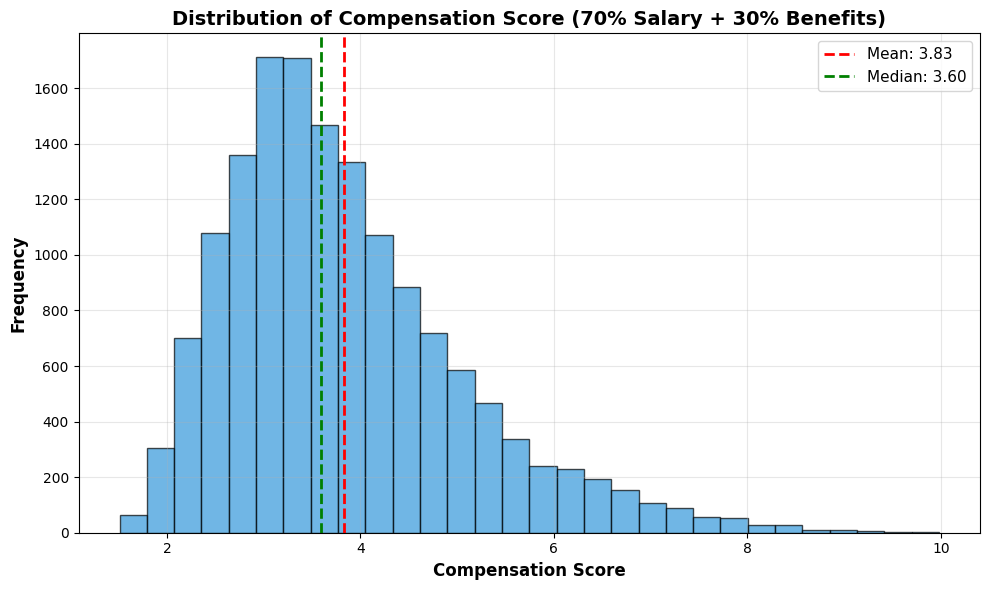

In [37]:
# Plot the distribution of the compensation score (combining salary and benefits)
plt.figure(figsize=(10, 6))

plt.hist(data['compensation_score'], bins=30, edgecolor='black', alpha=0.7, color='#3498db')

mean_val = data['compensation_score'].mean()
median_val = data['compensation_score'].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

plt.xlabel('Compensation Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Compensation Score (70% Salary + 30% Benefits)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

สุดท้ายได้สร้างคะแนนค่าตอบแทนรวม (Comprehensive Compensation Score) 
โดยรวมเงินเดือนและสวัสดิการเข้าด้วยกัน:

**วิธีการคำนวณ:**
1. นำเงินเดือน (`salary_usd`) มา normalize ให้อยู่ในช่วง 0-10
2. คำนวณคะแนนรวม: **70% เงินเดือน + 30% สวัสดิการ**
   - `compensation_score = (salary_normalized × 0.7) + (benefits_score × 0.3)`

**ผลลัพธ์:**
- คะแนนต่ำสุด: 1.51
- คะแนนสูงสุด: 9.98
- คะแนนเฉลี่ย: 3.83
- คะแนนกลาง: 3.60

คะแนนนี้ช่วยประเมินความน่าสนใจของงานโดยรวม โดยให้น้ำหนักกับเงินเดือนมากกว่าเล็กน้อย 
(70:30) เนื่องจากเงินเดือนมักเป็นปัจจัยหลักในการตัดสินใจของผู้สมัครงาน

In [57]:
print(f"\nDataset shape after processing: {data.shape}")
print(f"Total columns now: {len(data.columns)}")


Dataset shape after processing: (15000, 30)
Total columns now: 30


In [38]:
# Display sample of processed data
data.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,posting_month,posting_day,posting_dayofweek,posting_quarter,days_to_apply,work_type,salary_range,experience_category,benefits_category,compensation_score
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,10,18,4,4,20,Hybrid,Mid Level,Senior,Low Benefits,2.874816
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,11,20,2,4,52,Fully Remote,Mid Level,Junior,Low Benefits,2.120953
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,...,3,18,1,1,20,On-site,Executive Level,Junior,High Benefits,5.113519
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,...,12,23,0,4,63,Hybrid,Mid Level,Senior,High Benefits,3.490785
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,...,4,15,1,2,69,Fully Remote,Entry Level,Junior,Medium Benefits,2.402109
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,...,8,31,5,3,34,Hybrid,Senior Level,Senior,Low Benefits,3.508753
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,...,12,29,6,4,61,On-site,Mid Level,Mid-level,Medium Benefits,2.790378
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,...,6,7,4,2,24,On-site,Mid Level,Junior,Medium Benefits,3.007945
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,...,11,4,0,4,20,On-site,Executive Level,Senior,High Benefits,5.237888
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,...,10,20,6,4,17,On-site,Senior Level,Mid-level,Low Benefits,3.077420


**สรุปการประมวลผลข้อมูล:**

จากการประมวลผลข้อมูลด้านบน เราได้สร้างฟีเจอร์ใหม่ทั้งหมด 11 คอลัมน์:

1. **Time-based features (5 คอลัมน์):** `posting_year`, `posting_month`, `posting_day`, `posting_dayofweek`, `posting_quarter` - ช่วยวิเคราะห์แนวโน้มตามเวลา
2. **Application window:** `days_to_apply` - จำนวนวันที่เปิดรับสมัคร
3. **Categorical features (4 คอลัมน์):** `work_type`, `salary_range`, `experience_category`, `benefits_category` - จัดกลุ่มข้อมูลให้เข้าใจง่าย
4. **Derived metric:** `compensation_score` - คะแนนรวมค่าตอบแทนและสวัสดิการ

ขนาดข้อมูลหลังประมวลผล: **15,000 แถว × 30 คอลัมน์**

## Exploratory Data Analysis

#### Setup & Read Dataset

In [ ]:
from pathlib import Path
from IPython.display import display, Markdown

DISPLAY_ROWS = 100
DISPLAY_COLS = 120
TOPK = 20           
MAX_PLOT = 12       

candidates = [Path("ai_job_dataset.csv"), Path("/mnt/data/ai_job_dataset.csv")]
csv_path = next((p for p in candidates if p.exists()), None)
assert csv_path is not None, f"File not found in {candidates}"

try:
    df = pd.read_csv(csv_path, encoding="utf-8-sig")
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding="utf-8")

pd.set_option("display.max_rows", DISPLAY_ROWS)
pd.set_option("display.max_columns", DISPLAY_ROWS)
pd.set_option("display.width", DISPLAY_COLS)
pd.set_option("display.max_colwidth", 60)
pd.options.display.float_format = "{:,.2f}".format

def neat_preview(df_, n=5, title_suffix=""):
    display(Markdown(f"###  Dataset Overview {title_suffix}"))
    print(f"Rows: {len(df_):,} | Columns: {df_.shape[1]} | "
          f"Memory: {df_.memory_usage(deep=True).sum()/(1024**2):.3f} MB")
    display(Markdown("###  Columns Summary"))
    summary = pd.DataFrame({
        "dtype": df_.dtypes.astype(str),
        "non_null": df_.notna().sum(),
        "missing(%)": (df_.isna().mean()*100).round(2)
    })
    display(
        summary.reset_index(names="column")
               .style.hide(axis="index")
               .set_properties(**{"text-align":"left","white-space":"pre-wrap"})
               .set_table_styles([{"selector":"th","props":[("text-align","left")]}])
    )
    display(Markdown(f"###  Preview (first {n} rows)"))
    display(
        df_.head(n).style
            .hide(axis="index")
            .set_properties(**{"text-align":"left","white-space":"pre-wrap"})
            .set_table_styles([{"selector":"th","props":[("text-align","left")]}])
    )

neat_preview(df, n=5)

###  Dataset Overview 

Rows: 15,000 | Columns: 19 | Memory: 13.925 MB


###  Columns Summary

column,dtype,non_null,missing(%)
job_id,object,15000,0.000000
job_title,object,15000,0.000000
salary_usd,int64,15000,0.000000
salary_currency,object,15000,0.000000
experience_level,object,15000,0.000000
employment_type,object,15000,0.000000
company_location,object,15000,0.000000
company_size,object,15000,0.000000
employee_residence,object,15000,0.000000
remote_ratio,int64,15000,0.000000


###  Preview (first 5 rows)

job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.900000,Smart Analytics
AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.200000,TechCorp Inc
AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.400000,Autonomous Tech
AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.600000,Future Systems
AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.600000,Advanced Robotics


In [29]:
display(Markdown("###  Data Quality"))

# Missing values
na_count = df.isna().sum().sort_values(ascending=False)
na_ratio = (df.isna().mean()*100).sort_values(ascending=False)
na_tbl = pd.DataFrame({"missing_count": na_count, "missing_pct": na_ratio})
display(Markdown("#### Missing Values Summary"))
display(na_tbl[na_tbl["missing_count"] > 0])

# Bar chart ของ missing
if (na_tbl["missing_count"] > 0).any():
    plt.figure(figsize=(10, max(3, len(na_tbl)*0.25)))
    na_tbl[na_tbl["missing_count"] > 0]["missing_pct"].plot(kind="bar")
    plt.title("Missing Percentage by Column")
    plt.ylabel("Percent")
    plt.tight_layout()
    plt.show()

# Duplicates
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

###  Data Quality

#### Missing Values Summary

,missing_count,missing_pct


Duplicate rows: 0


In [26]:
display(Markdown("##  Descriptive Statistics"))

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

if num_cols:
    display(Markdown("### Numeric Variables"))
    display(df[num_cols].describe().T.style.format("{:,.2f}"))

if cat_cols:
    display(Markdown("### Categorical Variables"))
    display(df[cat_cols].describe(include="all").T)

##  Descriptive Statistics

Numeric columns: ['salary_usd', 'remote_ratio', 'years_experience', 'job_description_length', 'benefits_score']
Categorical columns: ['job_id', 'job_title', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'required_skills', 'education_required', 'industry', 'posting_date', 'application_deadline', 'company_name']


### Numeric Variables

,count,mean,std,min,25%,50%,75%,max
salary_usd,"15,000.00","115,348.97","60,260.94","32,519.00","70,179.75","99,705.00","146,408.50","399,095.00"
remote_ratio,"15,000.00",49.48,40.81,0.00,0.00,50.00,100.00,100.00
years_experience,"15,000.00",6.25,5.55,0.00,2.00,5.00,10.00,19.00
job_description_length,"15,000.00","1,503.31",576.13,500.00,"1,003.75","1,512.00","2,000.00","2,499.00"
benefits_score,"15,000.00",7.50,1.45,5.00,6.20,7.50,8.80,10.00


### Categorical Variables

,count,unique,top,freq
job_id,15000,15000,AI15000,1
job_title,15000,20,Machine Learning Researcher,808
salary_currency,15000,3,USD,11957
experience_level,15000,4,MI,3781
employment_type,15000,4,FT,3812
company_location,15000,20,Germany,814
company_size,15000,3,S,5007
employee_residence,15000,20,Sweden,790
required_skills,15000,13663,"Python, TensorFlow, PyTorch",17
education_required,15000,4,Bachelor,3789


##  Distributions

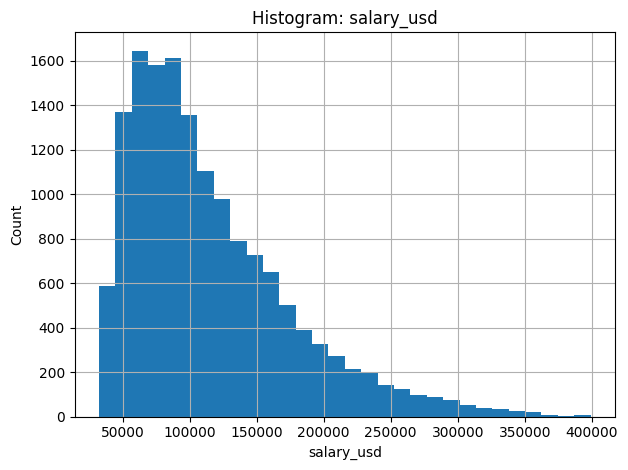

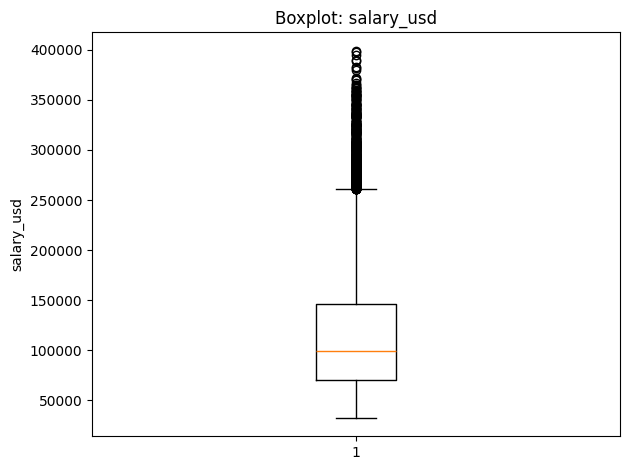

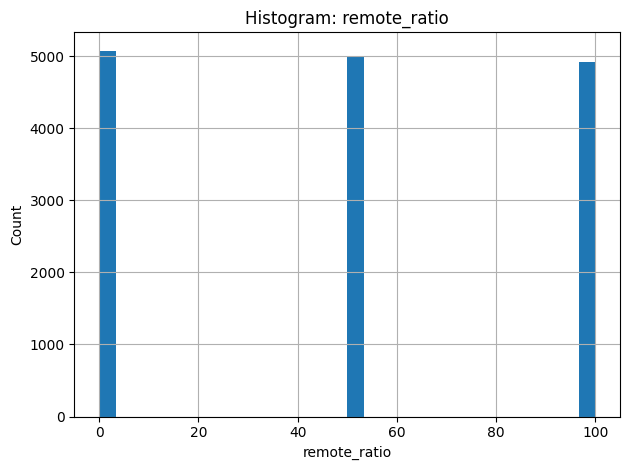

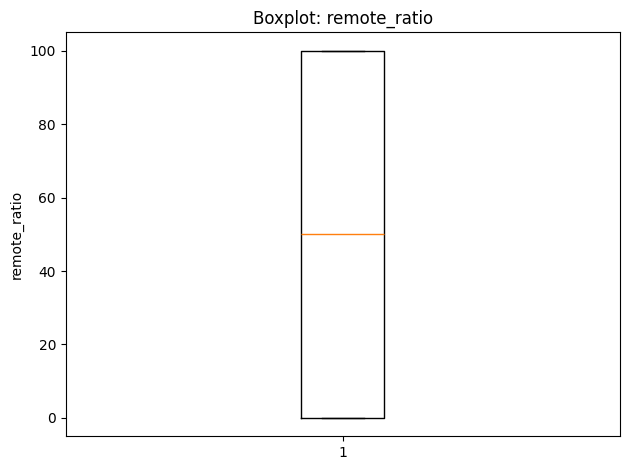

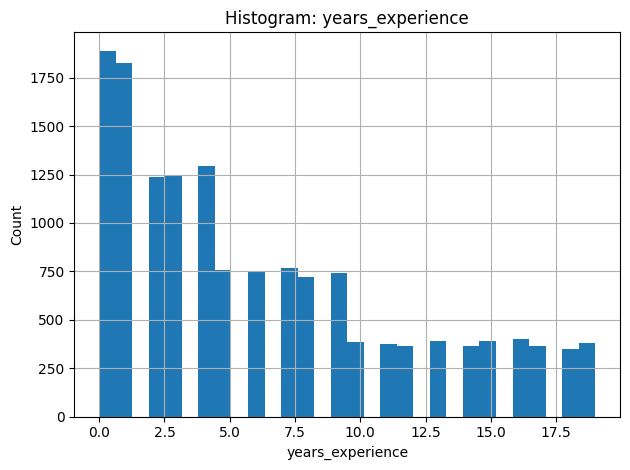

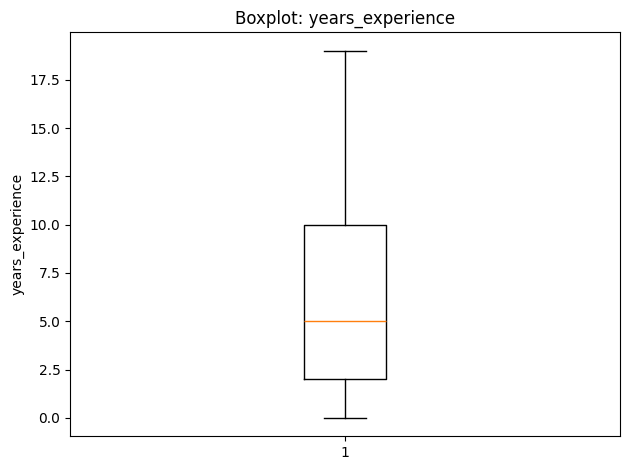

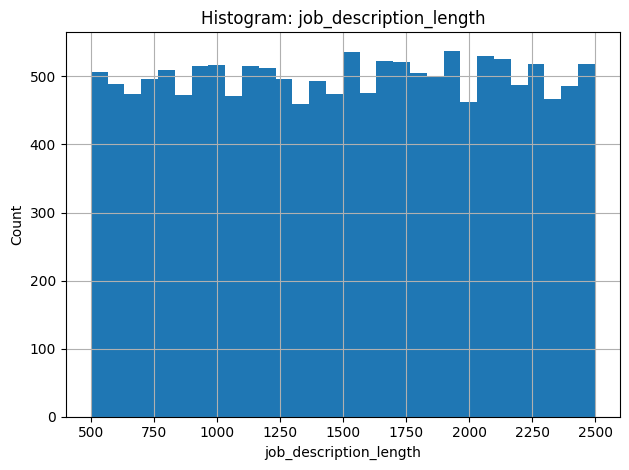

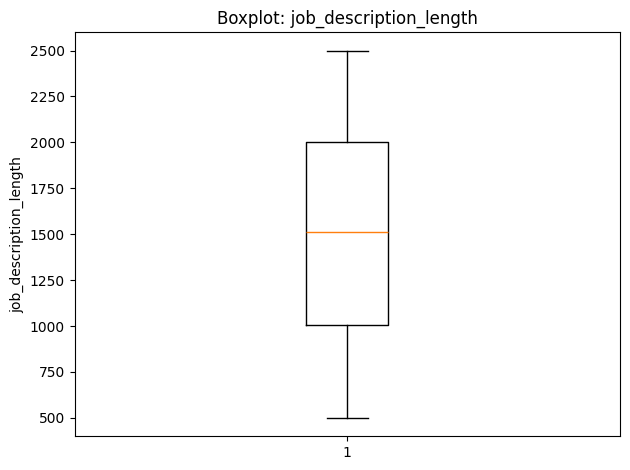

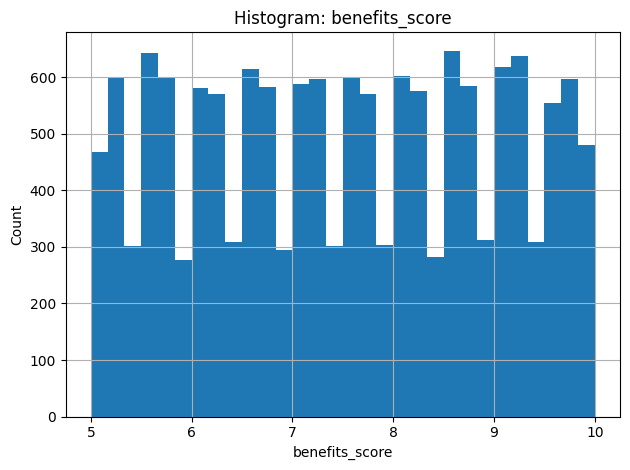

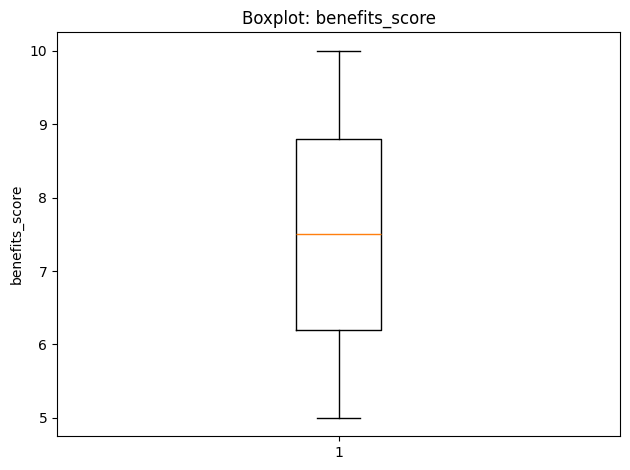

In [30]:
display(Markdown("##  Distributions"))

cols_to_plot = num_cols[:MAX_PLOT]
for col in cols_to_plot:
    # Histogram
    plt.figure()
    df[col].dropna().hist(bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

if len(num_cols) > MAX_PLOT:
    print(f"Note: Plotted only first {MAX_PLOT} numeric columns out of {len(num_cols)}")

In [32]:
display(Markdown("##  Outlier Check (IQR)"))

def iqr_outlier_ratio(s: pd.Series):
    s = s.dropna().astype(float)
    if s.empty: 
        return np.nan
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ( (s < lower) | (s > upper) ).mean()*100

if num_cols:
    outlier_pct = {c: iqr_outlier_ratio(df[c]) for c in num_cols}
    out_tbl = pd.DataFrame({"outlier_pct(IQR)": pd.Series(outlier_pct).round(2)}).sort_values(by="outlier_pct(IQR)", ascending=False)
    display(out_tbl)

##  Outlier Check (IQR)

,outlier_pct(IQR)
salary_usd,3.22
remote_ratio,0.00
years_experience,0.00
job_description_length,0.00
benefits_score,0.00


## Correlation

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
salary_usd,1.00,0.01,0.74,-0.01,0.00
remote_ratio,0.01,1.00,0.02,0.00,0.00
years_experience,0.74,0.02,1.00,-0.01,-0.01
job_description_length,-0.01,0.00,-0.01,1.00,0.01
benefits_score,0.00,0.00,-0.01,0.01,1.00


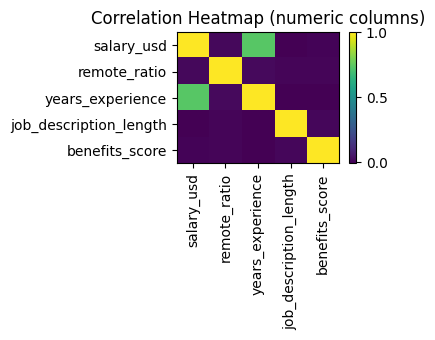

In [33]:
display(Markdown("## Correlation"))

if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    display(corr)

    plt.figure(figsize=(min(12, 1+0.6*len(num_cols)), min(10, 1+0.5*len(num_cols))))
    plt.imshow(corr.values, aspect='auto')
    plt.title("Correlation Heatmap (numeric columns)")
    plt.xticks(ticks=range(len(num_cols)), labels=num_cols, rotation=90)
    plt.yticks(ticks=range(len(num_cols)), labels=num_cols)
    plt.colorbar()
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap")

##  Categorical Analysis (Top-K)

### job_id — Top 20

,count
job_id,
AI15000,1
AI00001,1
AI00002,1
AI00003,1
AI00004,1
AI00005,1
AI00006,1
AI00007,1
AI14984,1


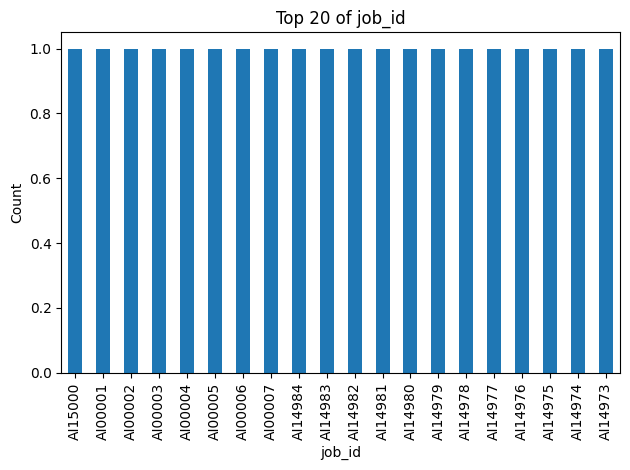

### job_title — Top 20

,count
job_title,
Machine Learning Researcher,808
AI Software Engineer,784
Autonomous Systems Engineer,777
Machine Learning Engineer,772
AI Architect,771
Head of AI,765
NLP Engineer,762
Robotics Engineer,759
Data Analyst,759


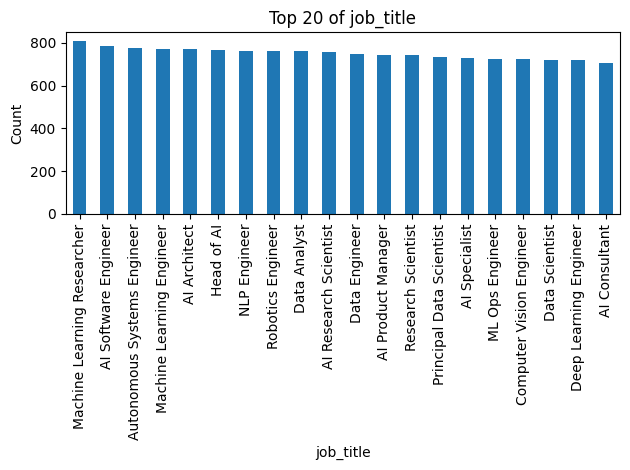

### salary_currency — Top 20

,count
salary_currency,
USD,11957
EUR,2314
GBP,729


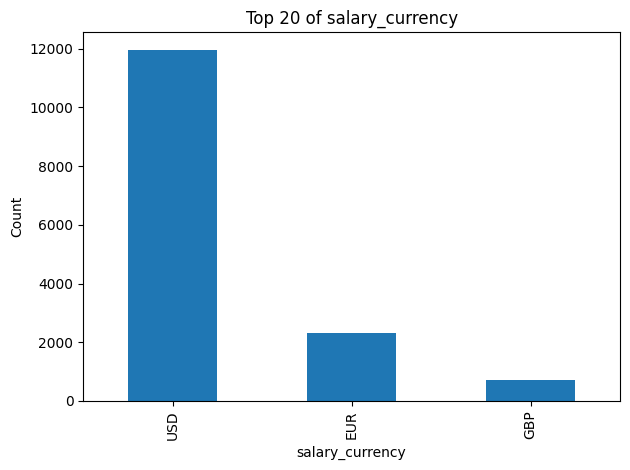

### experience_level — Top 20

,count
experience_level,
MI,3781
EX,3760
SE,3741
EN,3718


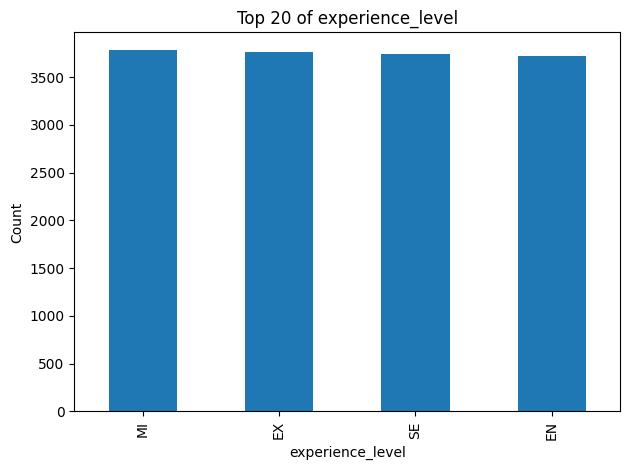

### employment_type — Top 20

,count
employment_type,
FT,3812
FL,3758
CT,3721
PT,3709


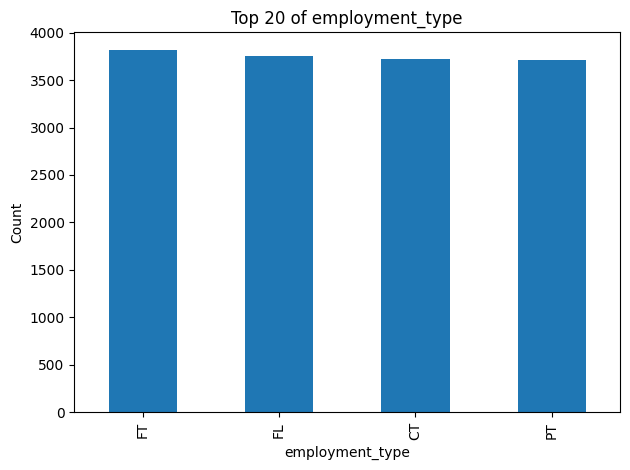

### company_location — Top 20

,count
company_location,
Germany,814
Denmark,778
Canada,769
France,769
Austria,765
Singapore,764
China,763
India,754
Sweden,752


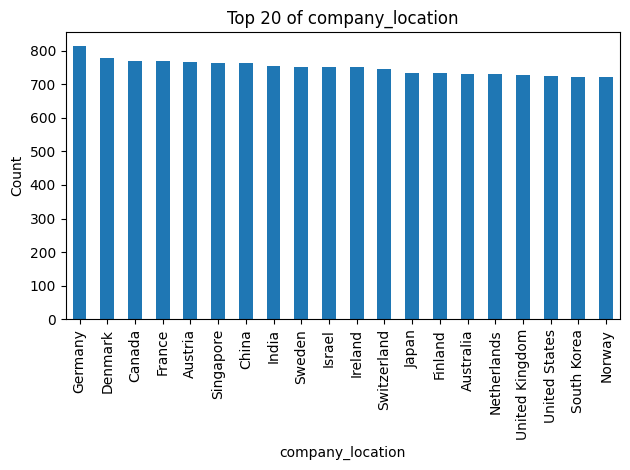

### company_size — Top 20

,count
company_size,
S,5007
L,4998
M,4995


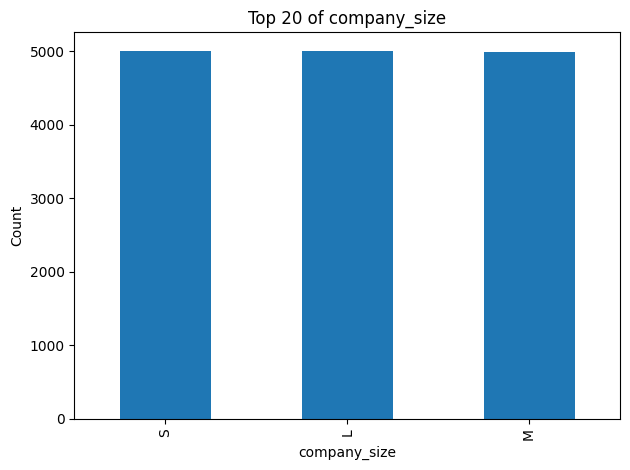

### employee_residence — Top 20

,count
employee_residence,
Sweden,790
France,781
Denmark,777
Austria,776
India,772
Germany,769
South Korea,763
Canada,762
China,761


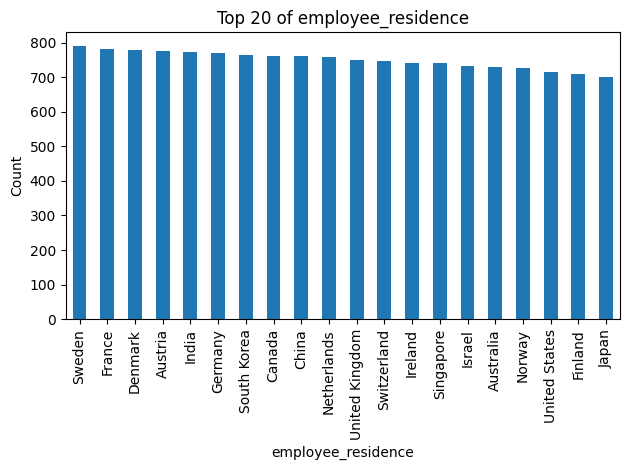

### required_skills — Top 20

,count
required_skills,
"Python, TensorFlow, PyTorch",17
"Python, TensorFlow, Tableau",9
"Python, TensorFlow, Linux",7
"Python, TensorFlow, MLOps",7
"Python, TensorFlow, Data Visualization",7
"PyTorch, SQL, Kubernetes",6
"Python, TensorFlow, Spark",6
"R, SQL, Spark",6
"SQL, PyTorch, GCP",6


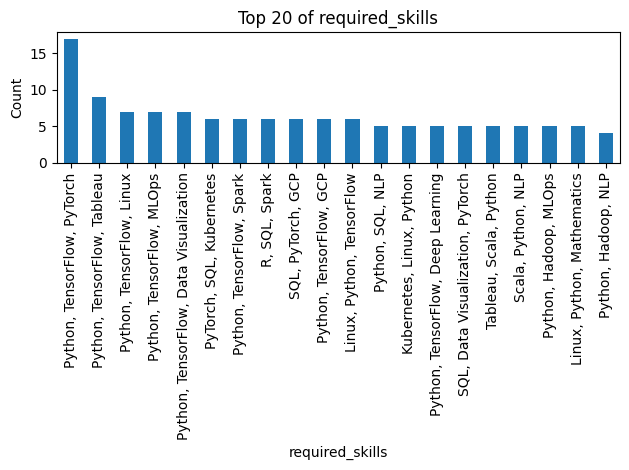

### education_required — Top 20

,count
education_required,
Bachelor,3789
Associate,3785
Master,3748
PhD,3678


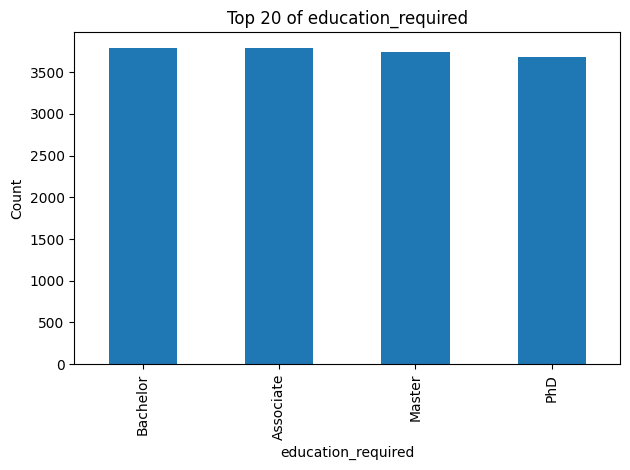

### industry — Top 20

,count
industry,
Retail,1063
Media,1045
Automotive,1020
Consulting,1020
Technology,1011
Real Estate,1007
Government,998
Transportation,997
Telecommunications,997


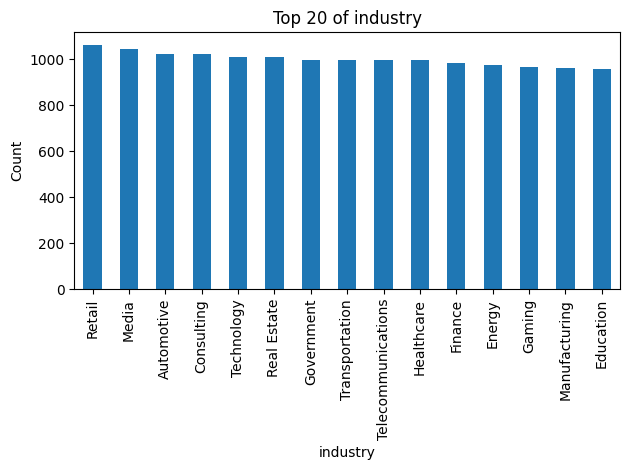

### posting_date — Top 20

,count
posting_date,
2024-07-05,51
2024-04-08,51
2024-08-25,49
2025-04-05,46
2024-03-01,44
2025-01-12,44
2024-04-12,43
2024-06-26,43
2024-08-28,43


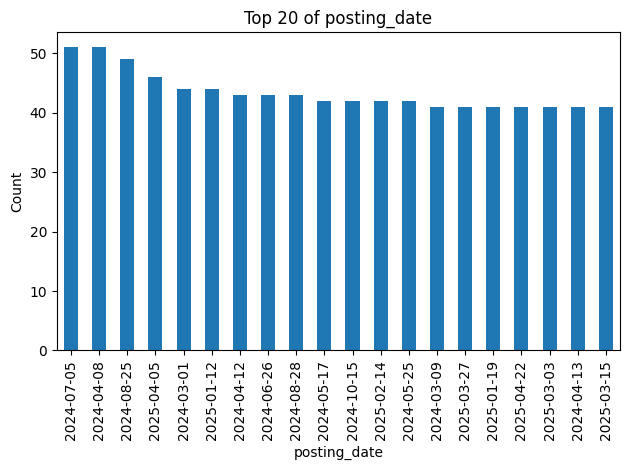

### application_deadline — Top 20

,count
application_deadline,
2025-01-05,47
2024-12-28,46
2025-04-07,45
2025-01-04,44
2024-08-27,44
2024-08-16,43
2024-07-22,43
2024-12-17,43
2024-07-10,43


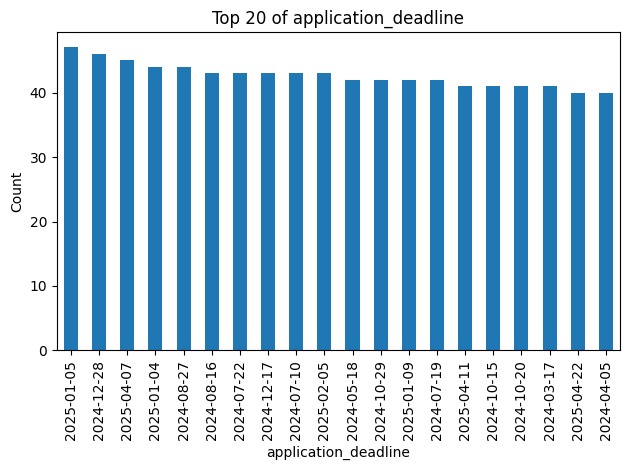

### company_name — Top 20

,count
company_name,
TechCorp Inc,980
Cognitive Computing,972
AI Innovations,964
Digital Transformation LLC,961
Quantum Computing Inc,960
Future Systems,960
Cloud AI Solutions,951
Predictive Systems,947
Smart Analytics,927


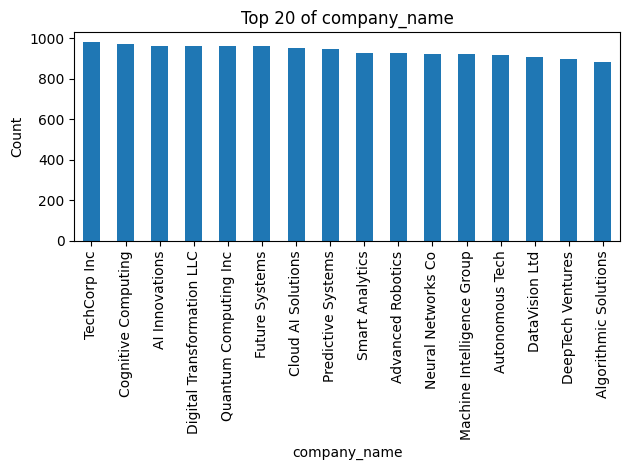

In [34]:
display(Markdown("##  Categorical Analysis (Top-K)"))

for col in cat_cols:
    vc = df[col].astype("object").value_counts(dropna=False).head(TOPK)
    display(Markdown(f"### {col} — Top {TOPK}"))
    display(vc.to_frame(name="count"))

    # bar chart
    if 2 <= vc.shape[0] <= TOPK:
        plt.figure()
        vc.plot(kind="bar")
        plt.title(f"Top {TOPK} of {col}")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

## ⏱️ Time-like Analysis

Date-like columns detected: ['posting_date', 'application_deadline']


### Daily Summary

,count,sum_value
posting_date,,
2024-01-01,23,3146915
2024-01-02,26,2838423
2024-01-03,33,3529521
2024-01-04,29,3072913
2024-01-05,38,4027162


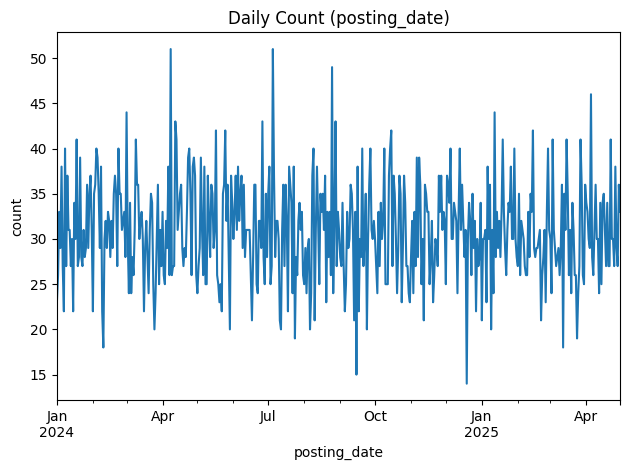

### Monthly Summary

,count,sum_value
posting_date,,
2024-01,953,111373360
2024-02,927,103942591
2024-03,932,106900057
2024-04,985,114250961
2024-05,955,110814236


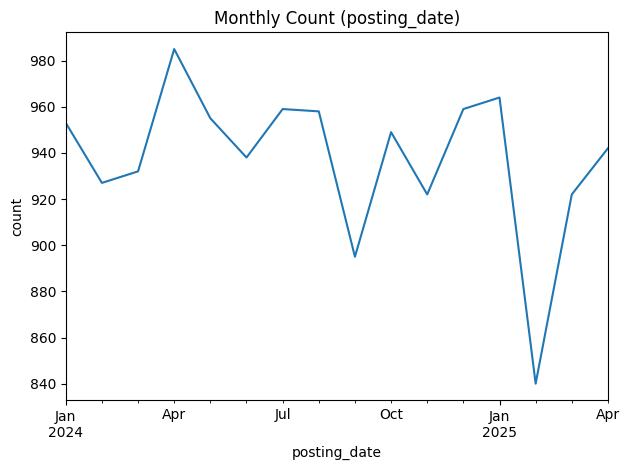

In [22]:
display(Markdown("##  Time-like Analysis"))

import warnings

def detect_date_columns(df, min_ratio=0.6, sample_size=300):
    date_cols = []
    for col in df.columns:
        s = df[col]
        if np.issubdtype(s.dtype, np.datetime64):
            date_cols.append(col)
            continue
        if s.dtype == 'object':
            # แซมเปิลค่าที่ไม่เป็น NA เพื่อลดเวลาและลด warning
            sample = s.dropna().astype(str).head(sample_size)
            if sample.empty:
                continue
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                parsed = pd.to_datetime(sample, errors="coerce")  # ไม่ใช้ infer_datetime_format แล้ว
            ratio = parsed.notna().mean()
            if ratio >= min_ratio:
                date_cols.append(col)
    return date_cols

with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # ปิดคำเตือน parsing ในบล็อคนี้

date_like = detect_date_columns(df, min_ratio=0.6, sample_size=300)
print("Date-like columns detected:", date_like)

if date_like:
    dcol = date_like[0]  # เลือกคอลัมน์แรกเป็นตัวอย่าง
    s = pd.to_datetime(df[dcol], errors="coerce")

    # คอลัมน์ตัวเลขสำหรับ aggregate (ถ้ามี)
    target_num = next((c for c in df.select_dtypes(include=[np.number]).columns if c != dcol), None)

    # ===== Daily =====
    daily = pd.DataFrame({"count": s.dt.floor("D").value_counts().sort_index()})
    if target_num is not None:
        daily = daily.join(
            df.assign(_date=s.dt.floor("D")).groupby("_date")[target_num].sum().rename("sum_value"),
            how="left"
        )
    display(Markdown("### Daily Summary"))
    display(daily.head())

    if not daily.empty:
        plt.figure()
        daily["count"].plot()
        plt.title(f"Daily Count ({dcol})")
        plt.ylabel("count")
        plt.tight_layout()
        plt.show()

    # ===== Monthly =====
    monthly = pd.DataFrame({"count": s.dt.to_period("M").value_counts().sort_index().astype(int)})
    if target_num is not None:
        monthly = monthly.join(
            df.assign(_period=s.dt.to_period("M")).groupby("_period")[target_num].sum().rename("sum_value"),
            how="left"
        )
    display(Markdown("### Monthly Summary"))
    display(monthly.head())

    if not monthly.empty:
        plt.figure()
        monthly["count"].plot()
        plt.title(f"Monthly Count ({dcol})")
        plt.ylabel("count")
        plt.tight_layout()
        plt.show()
else:
    print("No date-like columns detected")


# Data Modeling